In [58]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

sns.set_theme

<function seaborn.rcmod.set_theme(context='notebook', style='darkgrid', palette='deep', font='sans-serif', font_scale=1, color_codes=True, rc=None)>

### Formatting dataset
Reading both attribute tables for each region, merging then togheter as one. Deleting addition columns made by mistake in QGIS. Adding season column. 

In [3]:
romsdal = pd.read_csv('Romsdal_attribute.csv')
romsdal.head(10)
print(len(romsdal))

10312


In [4]:
lyngen = pd.read_csv('Lyngen_attribute.csv')
lyngen.head(10)
print(len(lyngen))

12163


In [5]:
data = romsdal.append(lyngen, ignore_index=True)
print(len(data))
data.head(4)

22475


/var/folders/bs/rjz55_zs4rncnjv_rr32wdg40000gn/T/ipykernel_69180/923439702.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = romsdal.append(lyngen, ignore_index=True)


,fid,OBJECTID,skredTidspunkt,Dato,Tidsnøyaktighet,registrertDato,registrertAv,Kvalitet,objektType,X,...,SHAPE_Length,SHAPE_Area,new_Dato,new_registrertDato,count,registrertDays_Lyngen,skredDato,skredDate,test_histogram,test_histo
0,1,33,2020/04/30 06:07:08,2020/04/30 00:00:00,2 dager,2020/05/02 17:11:25,Sentinel-1,Godkjent kvalitet C,Utlop,143904.000837,...,447.282317,8403.50000,2020/04/30,2020/05/02,1,NaN,NaN,NaN,NaN,NaN
1,2,49,2020/02/09 11:54:32,2020/02/09 00:00:00,6 timer,2020/02/09 17:02:33,Sentinel-1,Godkjent kvalitet B,Utlop,153611.500705,...,1926.770265,67626.50000,2020/02/09,2020/02/09,1,NaN,NaN,NaN,NaN,NaN
2,3,60,2020/02/11 23:58:21,2020/02/11 00:00:00,2 dager,2020/02/14 05:54:33,Sentinel-1,Godkjent kvalitet C,Utlop,128153.501250,...,1207.576902,37723.47785,2020/02/11,2020/02/14,1,NaN,NaN,NaN,NaN,NaN
3,4,73,2020/04/13 18:59:07,2020/04/13 00:00:00,12 timer,2020/04/14 05:54:34,Sentinel-1,Godkjent kvalitet B,Utlop,103265.852901,...,606.528273,12558.50000,2020/04/13,2020/04/14,1,NaN,NaN,NaN,NaN,NaN


In [6]:
data['year'] = pd.DatetimeIndex(data['Dato']).year
data['month_skredTidspunkt'] = pd.DatetimeIndex(data['Dato']).month
data['quarter'] = pd.DatetimeIndex(data['Dato']).quarter
data.head(2)

,fid,OBJECTID,skredTidspunkt,Dato,Tidsnøyaktighet,registrertDato,registrertAv,Kvalitet,objektType,X,...,new_registrertDato,count,registrertDays_Lyngen,skredDato,skredDate,test_histogram,test_histo,year,month_skredTidspunkt,quarter
0,1,33,2020/04/30 06:07:08,2020/04/30 00:00:00,2 dager,2020/05/02 17:11:25,Sentinel-1,Godkjent kvalitet C,Utlop,143904.000837,...,2020/05/02,1,NaN,NaN,NaN,NaN,NaN,2020,4,2
1,2,49,2020/02/09 11:54:32,2020/02/09 00:00:00,6 timer,2020/02/09 17:02:33,Sentinel-1,Godkjent kvalitet B,Utlop,153611.500705,...,2020/02/09,1,NaN,NaN,NaN,NaN,NaN,2020,2,1


In [7]:
data["year_quarter"] = data['year'].astype(str) + "_" + data["quarter"].astype(str)
data.head()

,fid,OBJECTID,skredTidspunkt,Dato,Tidsnøyaktighet,registrertDato,registrertAv,Kvalitet,objektType,X,...,count,registrertDays_Lyngen,skredDato,skredDate,test_histogram,test_histo,year,month_skredTidspunkt,quarter,year_quarter
0,1,33,2020/04/30 06:07:08,2020/04/30 00:00:00,2 dager,2020/05/02 17:11:25,Sentinel-1,Godkjent kvalitet C,Utlop,143904.000837,...,1,NaN,NaN,NaN,NaN,NaN,2020,4,2,2020_2
1,2,49,2020/02/09 11:54:32,2020/02/09 00:00:00,6 timer,2020/02/09 17:02:33,Sentinel-1,Godkjent kvalitet B,Utlop,153611.500705,...,1,NaN,NaN,NaN,NaN,NaN,2020,2,1,2020_1
2,3,60,2020/02/11 23:58:21,2020/02/11 00:00:00,2 dager,2020/02/14 05:54:33,Sentinel-1,Godkjent kvalitet C,Utlop,128153.501250,...,1,NaN,NaN,NaN,NaN,NaN,2020,2,1,2020_1
3,4,73,2020/04/13 18:59:07,2020/04/13 00:00:00,12 timer,2020/04/14 05:54:34,Sentinel-1,Godkjent kvalitet B,Utlop,103265.852901,...,1,NaN,NaN,NaN,NaN,NaN,2020,4,2,2020_2
4,5,142,2020/11/29 11:54:00,2020/11/29 00:00:00,1 dager,2020/11/30 16:54:35,Sentinel-1,Godkjent kvalitet B,Utlop,146762.534432,...,1,NaN,NaN,NaN,NaN,NaN,2020,11,4,2020_4


In [8]:
#del data['new_Dato']
data.head()

,fid,OBJECTID,skredTidspunkt,Dato,Tidsnøyaktighet,registrertDato,registrertAv,Kvalitet,objektType,X,...,count,registrertDays_Lyngen,skredDato,skredDate,test_histogram,test_histo,year,month_skredTidspunkt,quarter,year_quarter
0,1,33,2020/04/30 06:07:08,2020/04/30 00:00:00,2 dager,2020/05/02 17:11:25,Sentinel-1,Godkjent kvalitet C,Utlop,143904.000837,...,1,NaN,NaN,NaN,NaN,NaN,2020,4,2,2020_2
1,2,49,2020/02/09 11:54:32,2020/02/09 00:00:00,6 timer,2020/02/09 17:02:33,Sentinel-1,Godkjent kvalitet B,Utlop,153611.500705,...,1,NaN,NaN,NaN,NaN,NaN,2020,2,1,2020_1
2,3,60,2020/02/11 23:58:21,2020/02/11 00:00:00,2 dager,2020/02/14 05:54:33,Sentinel-1,Godkjent kvalitet C,Utlop,128153.501250,...,1,NaN,NaN,NaN,NaN,NaN,2020,2,1,2020_1
3,4,73,2020/04/13 18:59:07,2020/04/13 00:00:00,12 timer,2020/04/14 05:54:34,Sentinel-1,Godkjent kvalitet B,Utlop,103265.852901,...,1,NaN,NaN,NaN,NaN,NaN,2020,4,2,2020_2
4,5,142,2020/11/29 11:54:00,2020/11/29 00:00:00,1 dager,2020/11/30 16:54:35,Sentinel-1,Godkjent kvalitet B,Utlop,146762.534432,...,1,NaN,NaN,NaN,NaN,NaN,2020,11,4,2020_4


In [9]:
season = []

for row in data['year_quarter']:
    if row == '2017_1' : season.append('16/17')
    elif row == '2017_2' : season.append('16/17')
    elif row == '2017_3' : season.append('17/18')
    elif row == '2017_4' : season.append('17/18')
    elif row == '2018_1' : season.append('17/18')
    elif row == '2018_2' : season.append('17/18')
    elif row == '2018_3' : season.append('18/19')
    elif row == '2018_4' : season.append('18/19')
    elif row == '2019_1' : season.append('18/19')
    elif row == '2019_2' : season.append('18/19')
    elif row == '2019_3' : season.append('19/20')
    elif row == '2019_4' : season.append('19/20')
    elif row == '2020_1' : season.append('19/20')
    elif row == '2020_2' : season.append('19/20')
    elif row == '2020_3' : season.append('20/21')
    elif row == '2020_4' : season.append('20/21')
    elif row == '2021_1' : season.append('20/21')
    elif row == '2021_2' : season.append('20/21')
    elif row == '2021_3' : season.append('21/22')
    elif row == '2021_4' : season.append('21/22')
    elif row == '2022_1' : season.append('21/22')
    elif row == '2022_2' : season.append('21/22')
    else: season.append('Nothing')


data['season']=season
data.head()

,fid,OBJECTID,skredTidspunkt,Dato,Tidsnøyaktighet,registrertDato,registrertAv,Kvalitet,objektType,X,...,registrertDays_Lyngen,skredDato,skredDate,test_histogram,test_histo,year,month_skredTidspunkt,quarter,year_quarter,season
0,1,33,2020/04/30 06:07:08,2020/04/30 00:00:00,2 dager,2020/05/02 17:11:25,Sentinel-1,Godkjent kvalitet C,Utlop,143904.000837,...,NaN,NaN,NaN,NaN,NaN,2020,4,2,2020_2,19/20
1,2,49,2020/02/09 11:54:32,2020/02/09 00:00:00,6 timer,2020/02/09 17:02:33,Sentinel-1,Godkjent kvalitet B,Utlop,153611.500705,...,NaN,NaN,NaN,NaN,NaN,2020,2,1,2020_1,19/20
2,3,60,2020/02/11 23:58:21,2020/02/11 00:00:00,2 dager,2020/02/14 05:54:33,Sentinel-1,Godkjent kvalitet C,Utlop,128153.501250,...,NaN,NaN,NaN,NaN,NaN,2020,2,1,2020_1,19/20
3,4,73,2020/04/13 18:59:07,2020/04/13 00:00:00,12 timer,2020/04/14 05:54:34,Sentinel-1,Godkjent kvalitet B,Utlop,103265.852901,...,NaN,NaN,NaN,NaN,NaN,2020,4,2,2020_2,19/20
4,5,142,2020/11/29 11:54:00,2020/11/29 00:00:00,1 dager,2020/11/30 16:54:35,Sentinel-1,Godkjent kvalitet B,Utlop,146762.534432,...,NaN,NaN,NaN,NaN,NaN,2020,11,4,2020_4,20/21


In [10]:
#Set order

#data['season'] = pd.Categorical(data['season'], ['18/19','19/20','20/21'])

In [11]:
data.rename(columns={"safeName": "NAWS Region"}, inplace=True)
data.nunique()



fid                          12163
OBJECTID                     22475
skredTidspunkt                 994
Dato                           502
Tidsnøyaktighet                  7
registrertDato                 526
registrertAv                     1
Kvalitet                         3
objektType                       1
X                            22112
Y                            22148
skredID                      22475
ansvarligInstitusjon             1
eksposisjonUtlopsomr           361
snittHelningUtlopssomr_gr       62
maksHelningUtlopsomr_gr         75
minHelningUtlopsomr_gr          51
Høyde                         1643
noyHoydeStoppSkred               1
baneFlagg                        2
veiFlagg                         2
elvenettFlagg                    2
bebyggelseProsent               27
jordbrukProsent                 67
breProsent                      94
kjenteSkredlopProsent           94
regions_id                       2
Varslingsregion                  2
NAWS Region         

### Detections per season

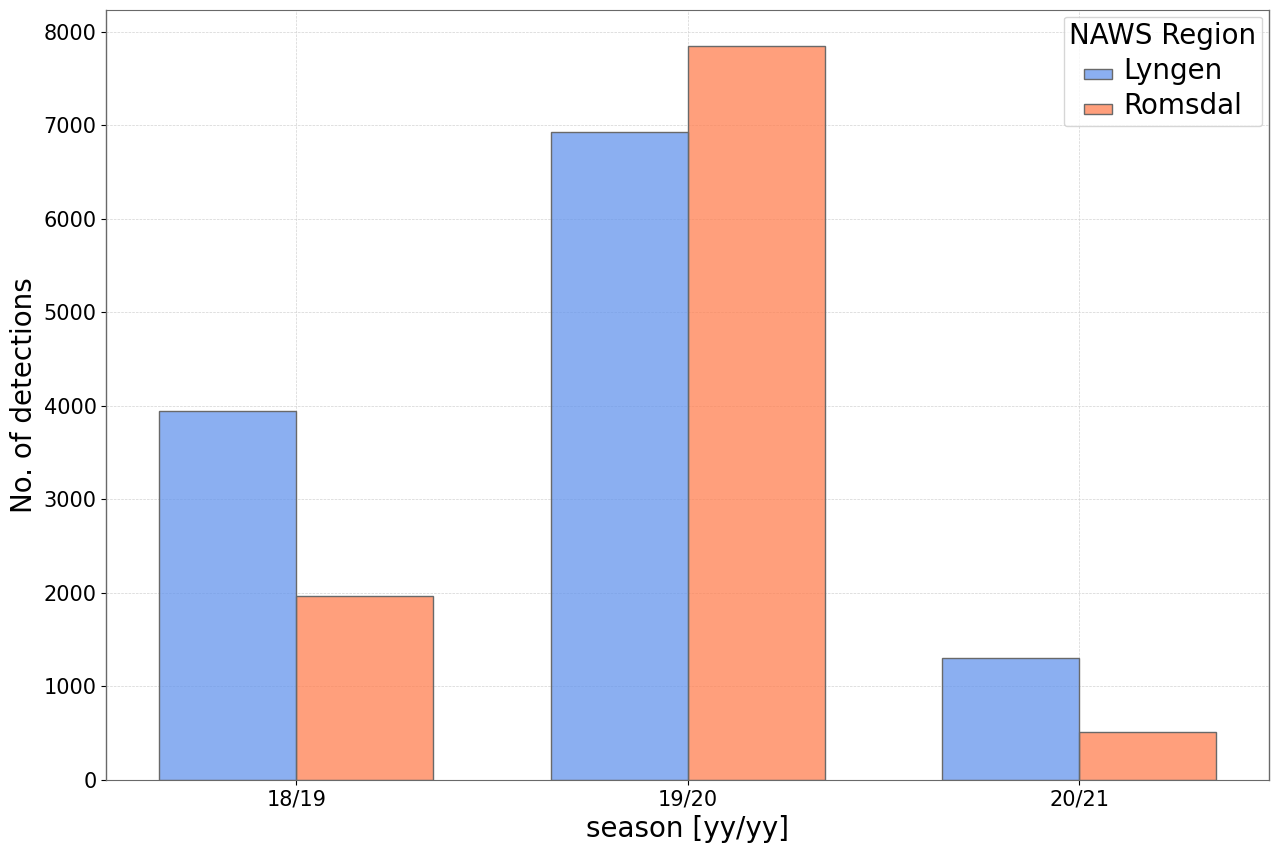

In [247]:
data = data.sort_values('season')

fig, axs = plt.subplots(figsize=(15,10))

ax = sns.histplot(data=data, x="season", hue='NAWS Region', multiple='dodge', zorder=2, palette=(['cornflowerblue','coral']), ec="dimgray", shrink=0.7)
#plt.title('No. detections in each season', fontsize=10)
plt.xlabel('season [yy/yy]', fontsize=20)
plt.ylabel('No. of detections', fontsize=20)
plt.grid(color = 'lightgrey', linestyle = '--', linewidth = 0.5, zorder=1)
ax.spines['bottom'].set_color('dimgrey')
ax.spines['top'].set_color('dimgrey') 
ax.spines['right'].set_color('dimgrey')
ax.spines['right'].set_linewidth(1)
ax.spines['left'].set_color('dimgrey')
ax.spines['left'].set_lw(1)
ax.xaxis.label.set_color('black')
ax.yaxis.label.set_color('black')
ax.tick_params(colors='black', which='both', labelsize=15)

plt.setp(ax.get_legend().get_texts(), fontsize='20') 
plt.setp(ax.get_legend().get_title(), fontsize='20') 
plt.show()

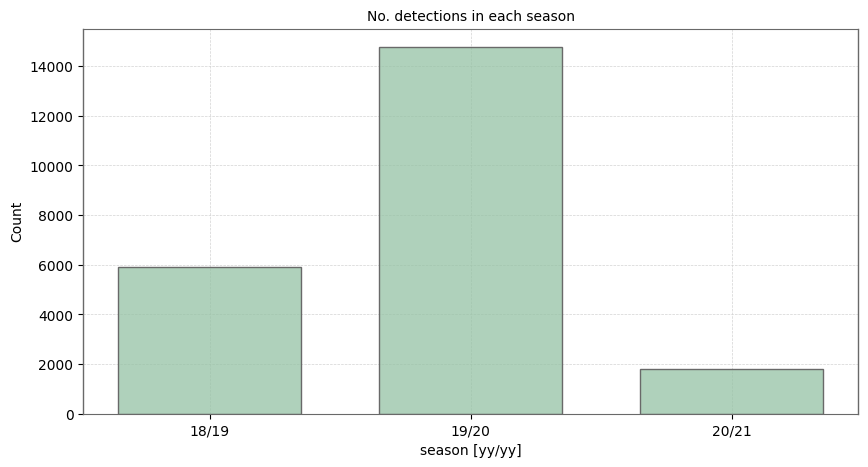

In [13]:
fig, axs = plt.subplots(figsize=(10,5))

data = data.sort_values('season')

ax = sns.histplot(data=data, x="season", zorder=2, color='#95C2A4', ec="dimgray", shrink=0.7)

plt.title('No. detections in each season', fontsize=10)
plt.xlabel('season [yy/yy]', fontsize=10)
plt.ylabel('Count', fontsize=10)
plt.grid(color = 'lightgrey', linestyle = '--', linewidth = 0.5, zorder=1)
ax.spines['bottom'].set_color('dimgrey')
ax.spines['top'].set_color('dimgrey') 
ax.spines['right'].set_color('dimgrey')
ax.spines['right'].set_linewidth(1)
ax.spines['left'].set_color('dimgrey')
ax.spines['left'].set_lw(1)
ax.xaxis.label.set_color('black')
ax.yaxis.label.set_color('black')
ax.tick_params(colors='black', which='both', labelsize=10)

### SHAPEarea Histograms
Stacked, dodge, separate

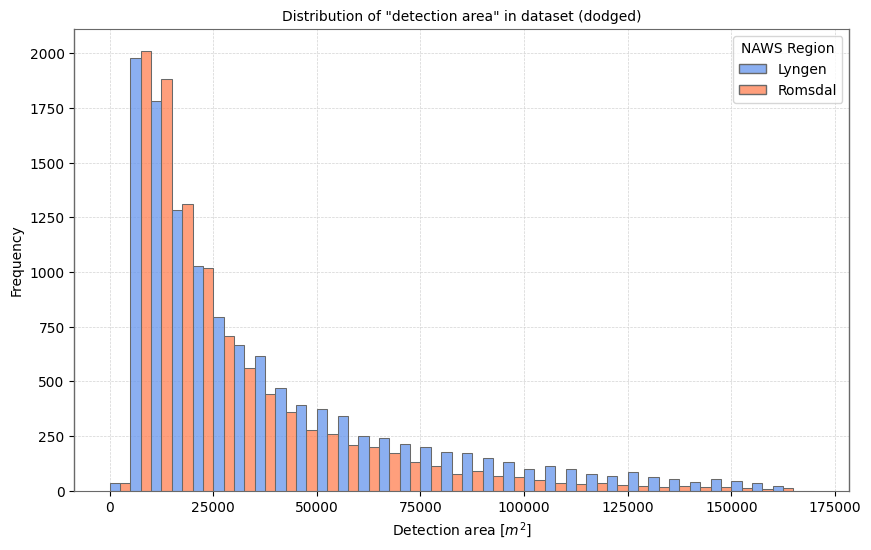

In [14]:
b = np.arange(0, 175000, 5000)

fig, axs = plt.subplots(figsize=(10,6))

ax = sns.histplot(data=data, x="SHAPE_Area", bins=b, hue='NAWS Region', multiple='dodge', zorder=2, palette=(['cornflowerblue','coral']), ec="dimgray")
plt.title('Distribution of "detection area" in dataset (dodged)', fontsize=10)
plt.xlabel('Detection area [$m^{2}$]', fontsize=10)
plt.ylabel('Frequency', fontsize=10)
plt.grid(color = 'lightgrey', linestyle = '--', linewidth = 0.5, zorder=1)
ax.spines['bottom'].set_color('dimgrey')
ax.spines['top'].set_color('dimgrey') 
ax.spines['right'].set_color('dimgrey')
ax.spines['right'].set_linewidth(1)
ax.spines['left'].set_color('dimgrey')
ax.spines['left'].set_lw(1)
ax.xaxis.label.set_color('black')
ax.yaxis.label.set_color('black')
ax.tick_params(colors='black', which='both', labelsize=10)

In [15]:
from matplotlib.ticker import MultipleLocator

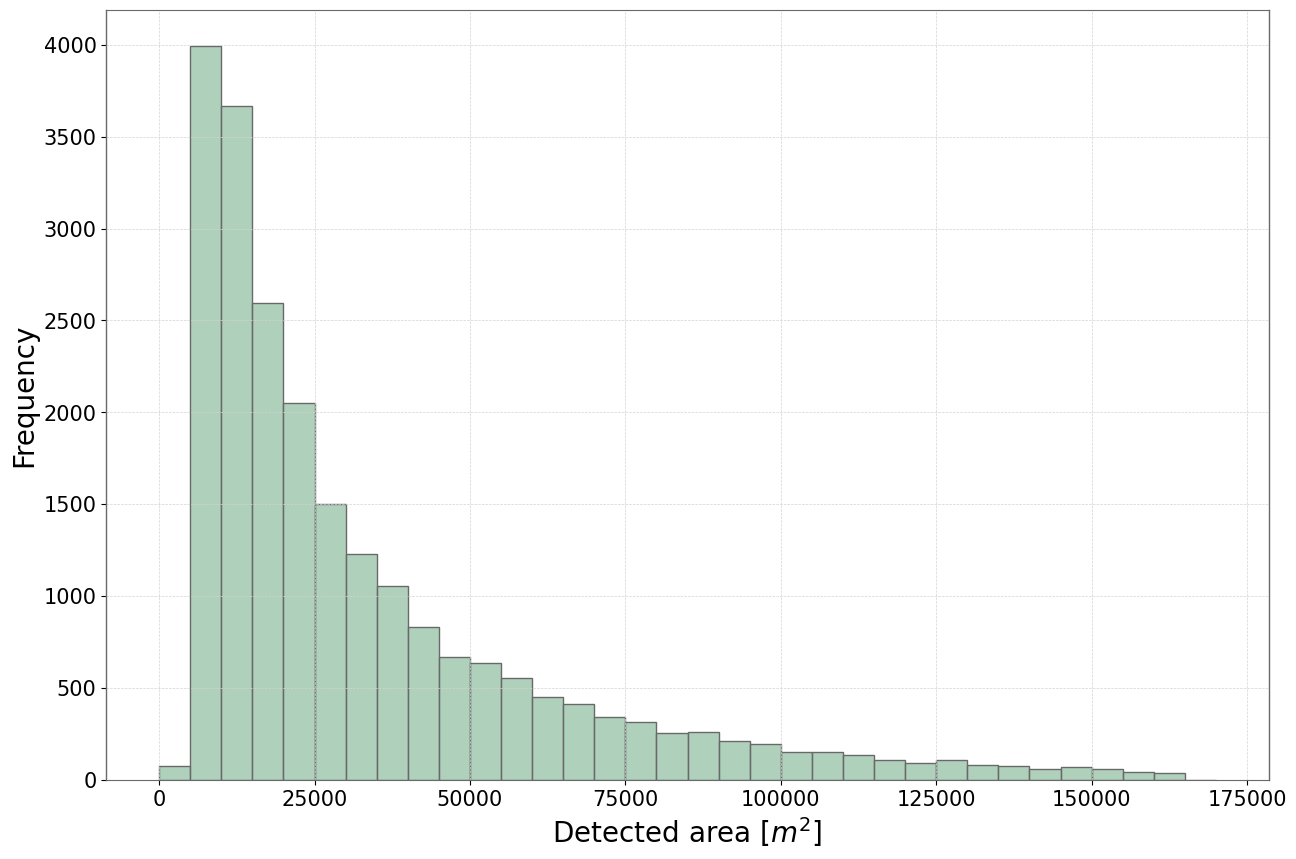

In [234]:
b = np.arange(0, 175000, 5000)

fig, axs = plt.subplots(figsize=(15,10))

ax = sns.histplot(data=data, x="SHAPE_Area", bins=b, color='#95C2A4', ec="dimgray")
#plt.title('Distribution of "detection area" in dataset', fontsize=10)
plt.xlabel('Detected area [$m^{2}$]', fontsize=20)
plt.ylabel('Frequency', fontsize=20)
plt.grid(color = 'lightgrey', linestyle = '--', linewidth = 0.5, zorder=1)
ax.spines['bottom'].set_color('dimgrey')
ax.spines['top'].set_color('dimgrey') 
ax.spines['right'].set_color('dimgrey')
ax.spines['right'].set_linewidth(1)
ax.spines['left'].set_color('dimgrey')
ax.spines['left'].set_lw(1)
ax.xaxis.label.set_color('black')
ax.yaxis.label.set_color('black')
ax.tick_params(colors='black', which='both', labelsize=15)

In [190]:
len(data[data['SHAPE_Area'] < 25000]) / len(data)*100

55.043381535038925

In [195]:
print(data['SHAPE_Area'].mean())
print(data['SHAPE_Area'].median())

33646.96006749466
22094.5


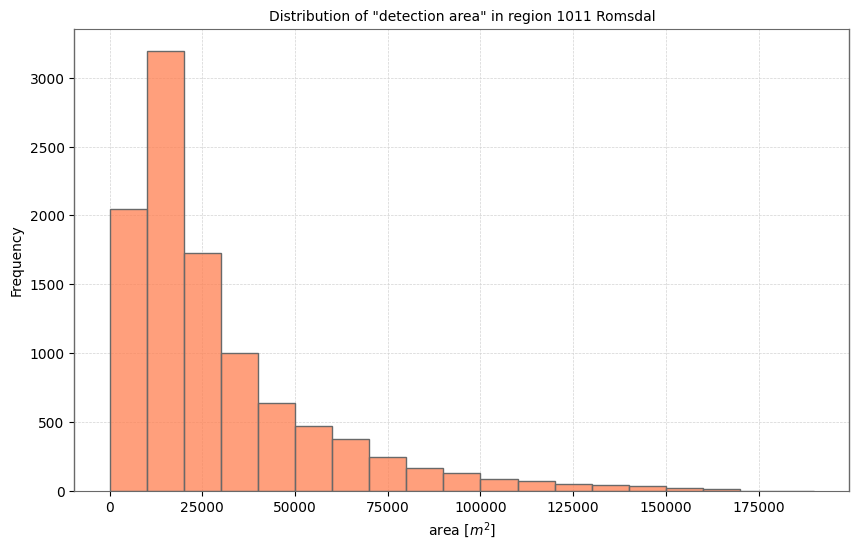

In [17]:
b = np.arange(0, 200000, 10000)

fig, axs = plt.subplots(figsize=(10,6))

ax = sns.histplot(data=romsdal, x="SHAPE_Area", bins=b,  multiple='stack', zorder=2, color=('coral'), ec="dimgray")
plt.title('Distribution of "detection area" in region 1011 Romsdal', fontsize=10)
plt.xlabel('area [$m^{2}$]', fontsize=10)
plt.ylabel('Frequency', fontsize=10)
plt.grid(color = 'lightgrey', linestyle = '--', linewidth = 0.5, zorder=1)
ax.spines['bottom'].set_color('dimgrey')
ax.spines['top'].set_color('dimgrey') 
ax.spines['right'].set_color('dimgrey')
ax.spines['right'].set_linewidth(1)
ax.spines['left'].set_color('dimgrey')
ax.spines['left'].set_lw(1)
ax.xaxis.label.set_color('black')
ax.yaxis.label.set_color('black')
ax.tick_params(colors='black', which='both', labelsize=10)

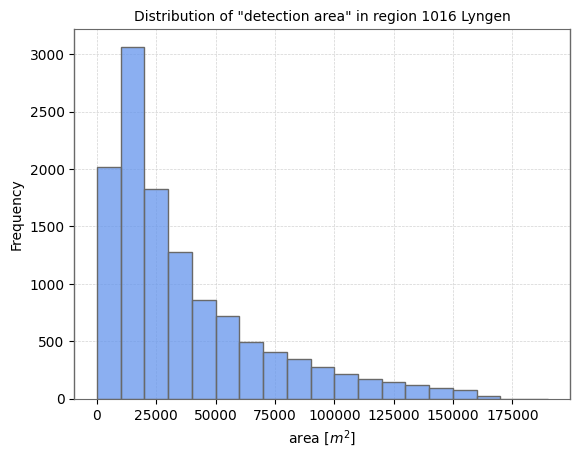

In [18]:
b = np.arange(0, 200000, 10000)

ax = sns.histplot(data=lyngen, x="SHAPE_Area", bins=b, multiple='stack', zorder=2, color=('cornflowerblue'), ec="dimgray")
plt.title('Distribution of "detection area" in region 1016 Lyngen', fontsize=10)
plt.xlabel('area [$m^{2}$]', fontsize=10)
plt.ylabel('Frequency', fontsize=10)
plt.grid(color = 'lightgrey', linestyle = '--', linewidth = 0.5, zorder=1)
ax.spines['bottom'].set_color('dimgrey')
ax.spines['top'].set_color('dimgrey') 
ax.spines['right'].set_color('dimgrey')
ax.spines['right'].set_linewidth(1)
ax.spines['left'].set_color('dimgrey')
ax.spines['left'].set_lw(1)
ax.xaxis.label.set_color('black')
ax.yaxis.label.set_color('black')
ax.tick_params(colors='black', which='both', labelsize=10)

In [34]:
# change column labels
temporal_precision = {'4 timer':'4 hours',
             '6 timer':'6 hours',
             '12 timer':'12 hours',
             '1 dager':'24 hours',
             '2 dager':'48 hours',
             '3 dager':'3 days',
             '6 dager':'6 days',}

data.replace("4 timer", "4 hours", inplace=True)

data.head(10000
          )

,fid,OBJECTID,skredTidspunkt,Dato,Tidsnøyaktighet,registrertDato,registrertAv,Kvalitet,objektType,X,...,registrertDays_Lyngen,skredDato,skredDate,test_histogram,test_histo,year,month_skredTidspunkt,quarter,year_quarter,season
13395,3084,84823,2020-01-18T04:32:52.000,2020-01-18T00:00:00.000,12 hours,2020-01-18T15:59:15.000,Sentinel-1,Godkjent kvalitet A,Utlop,680567.824982,...,2020/01/18,2020/01/18 04:32:52,2020/01/18,NaN,2020-01-18,2020,1,1,2020_1,19/20
16338,6027,167757,2019-12-06T05:11:35.000,2019-12-06T00:00:00.000,3 days,2019-12-09T05:11:58.000,Sentinel-1,Godkjent kvalitet A,Utlop,685374.249976,...,2019/12/09,2019/12/06 05:11:35,2019/12/06,NaN,2019-12-06,2019,12,4,2019_4,19/20
16942,6631,184175,2020-04-17T23:38:50.000,2020-04-17T00:00:00.000,6 hours,2020-04-18T05:19:22.000,Sentinel-1,Godkjent kvalitet A,Utlop,699017.999952,...,2020/04/18,2020/04/17 23:38:50,2020/04/17,NaN,2020-04-17,2020,4,2,2020_2,19/20
16077,5766,160865,2020-04-29T23:38:51.000,2020-04-29T00:00:00.000,6 hours,2020-04-30T05:19:23.000,Sentinel-1,Godkjent kvalitet A,Utlop,698071.544691,...,2020/04/30,2020/04/29 23:38:51,2020/04/29,NaN,2020-04-29,2020,4,2,2020_2,19/20
21774,11463,244188,2019-01-12T17:45:44.000,2019-01-12T00:00:00.000,12 hours,2019-01-13T05:11:04.000,Sentinel-1,Godkjent kvalitet A,Utlop,680668.505537,...,2019/01/13,2019/01/12 17:45:44,2019/01/12,NaN,2019-01-12,2019,1,1,2019_1,18/19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3538,3539,93720,2020/02/28 05:28:38,2020/02/28 00:00:00,12 hours,2020/02/28 16:54:26,Sentinel-1,Godkjent kvalitet B,Utlop,146599.600823,...,NaN,NaN,NaN,NaN,NaN,2020,2,1,2020_1,19/20
3551,3552,94028,2020/05/27 12:23:57,2020/05/27 00:00:00,4 hours,2020/05/27 17:02:36,Sentinel-1,Godkjent kvalitet B,Utlop,139371.800211,...,NaN,NaN,NaN,NaN,NaN,2020,5,2,2020_2,19/20
3552,3553,94034,2020/04/13 18:59:07,2020/04/13 00:00:00,12 hours,2020/04/14 05:54:34,Sentinel-1,Godkjent kvalitet B,Utlop,109244.501954,...,NaN,NaN,NaN,NaN,NaN,2020,4,2,2020_2,19/20
3553,3554,94035,2020/03/29 05:58:37,2020/03/29 00:00:00,12 hours,2020/03/29 16:55:08,Sentinel-1,Godkjent kvalitet B,Utlop,140130.000967,...,NaN,NaN,NaN,NaN,NaN,2020,3,1,2020_1,19/20


### Tidsnøyaktighet

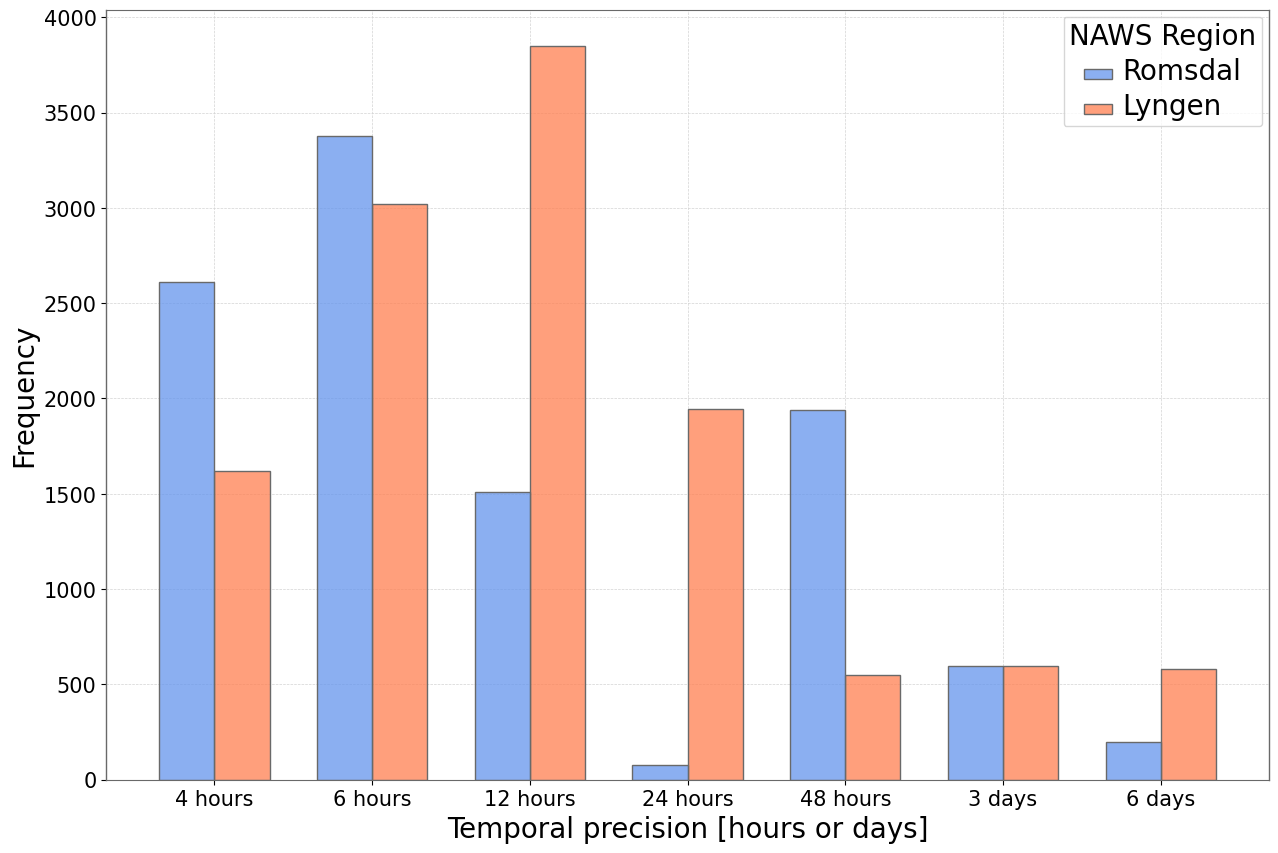

In [235]:
#time_accuracy = (['4 timer', '6 timer', '12 timer', '1 dager', '2 dager', '3 dager', '6 dager'])

#data = data.sort_values(by='Tidsnøyaktighet', key=time_accuracy)
#sns.histplot(data=data, x="Tidsnøyaktighet", hue='safeName', multiple='dodge', shrink=0.7)

sort_order = {
'4 hours':0,
'6 hours':1,
'12 hours':2,
'24 hours':3,
'48 hours':4,
'3 days':5,
'6 days':6,
}

data = data.sort_values(by=['Tidsnøyaktighet'], key=lambda x: x.map(sort_order))

fig, axs = plt.subplots(figsize=(15,10))


ax = sns.histplot(data=data, x="Tidsnøyaktighet", hue='NAWS Region', multiple='dodge', zorder=2, palette=(['cornflowerblue', 'coral']), ec="dimgray", shrink=0.7)
#plt.title('Time accuracy in detections', fontsize=10)
plt.xlabel('Temporal precision [hours or days]', fontsize=20)
plt.ylabel('Frequency', fontsize=20)
plt.grid(color = 'lightgrey', linestyle = '--', linewidth = 0.5, zorder=1)
ax.spines['bottom'].set_color('dimgrey')
ax.spines['top'].set_color('dimgrey') 
ax.spines['right'].set_color('dimgrey')
ax.spines['right'].set_linewidth(1)
ax.spines['left'].set_color('dimgrey')
ax.spines['left'].set_lw(1)
ax.xaxis.label.set_color('black')
ax.yaxis.label.set_color('black')
ax.tick_params(colors='black', which='both', labelsize=15)
plt.setp(ax.get_legend().get_texts(), fontsize='20') 
plt.setp(ax.get_legend().get_title(), fontsize='20') 
plt.show()


In [179]:
len(data[data['Tidsnøyaktighet'] == '6 hours'])

6397

In [184]:
(len(data[data['Tidsnøyaktighet'] == '6 hours']) + len(data[data['Tidsnøyaktighet'] == '4 hours']) + len(data[data['Tidsnøyaktighet'] == '12 hours'])) / len(data) * 100

71.12791991101224

In [185]:
(len(data[data['Tidsnøyaktighet'] == '6 hours']) + len(data[data['Tidsnøyaktighet'] == '4 hours']) + len(data[data['Tidsnøyaktighet'] == '12 hours']))

15986

### Godkjent kvalitet

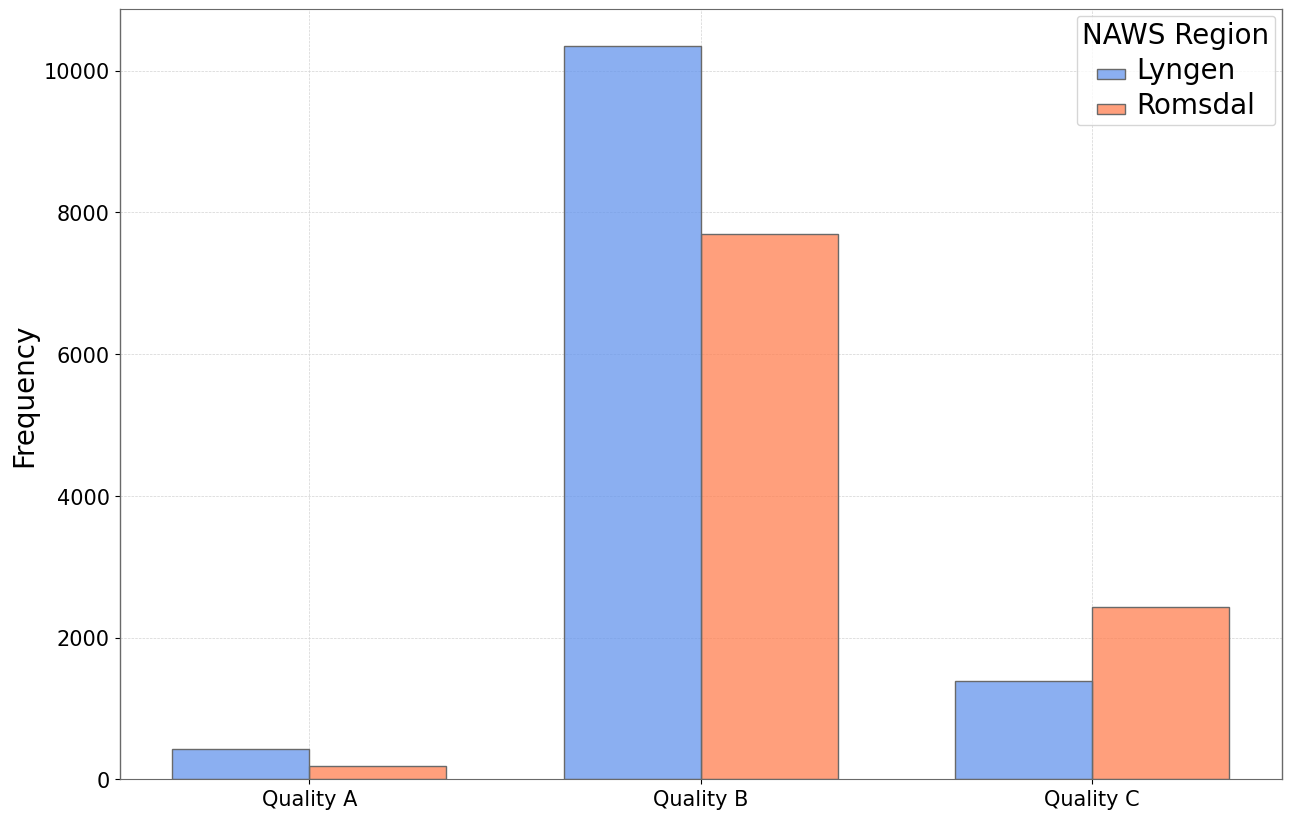

In [236]:
#sns.histplot(data=data, x="Kvalitet", hue='safeName', multiple='dodge', shrink=0.5)

data.replace("Godkjent kvalitet A", "Quality A", inplace=True)

data = data.sort_values('Kvalitet')

#data = data.Kvalitet.value_counts().loc[['Godkjent kvalitet A', 'Godkjent kvalitet B', 'Godkjent kvalitet C']]
data.head()


fig, axs = plt.subplots(figsize=(15,10))
ax = sns.histplot(data, x="Kvalitet", hue='NAWS Region', multiple='dodge', zorder=2, palette=(['cornflowerblue', 'coral']), ec="dimgray", shrink=0.7)
#plt.title('Distribution of "accetaptance quality" in detections', fontsize=10)
plt.xlabel('', fontsize=10)
plt.ylabel('Frequency', fontsize=20)
plt.grid(color = 'lightgrey', linestyle = '--', linewidth = 0.5, zorder=1)
ax.spines['bottom'].set_color('dimgrey')
ax.spines['top'].set_color('dimgrey') 
ax.spines['right'].set_color('dimgrey')
ax.spines['right'].set_linewidth(1)
ax.spines['left'].set_color('dimgrey')
ax.spines['left'].set_lw(1)
ax.xaxis.label.set_color('black')
ax.yaxis.label.set_color('black')
ax.tick_params(colors='black', which='both', labelsize=15)

plt.setp(ax.get_legend().get_texts(), fontsize='20') 
plt.setp(ax.get_legend().get_title(), fontsize='20') 
plt.show()


### Eskposisjon i datasett: Rose Plot

In [22]:
pip install plotly


[notice] A new release of pip available: 22.3.1 -> 23.0.1
[notice] To update, run: pip3 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


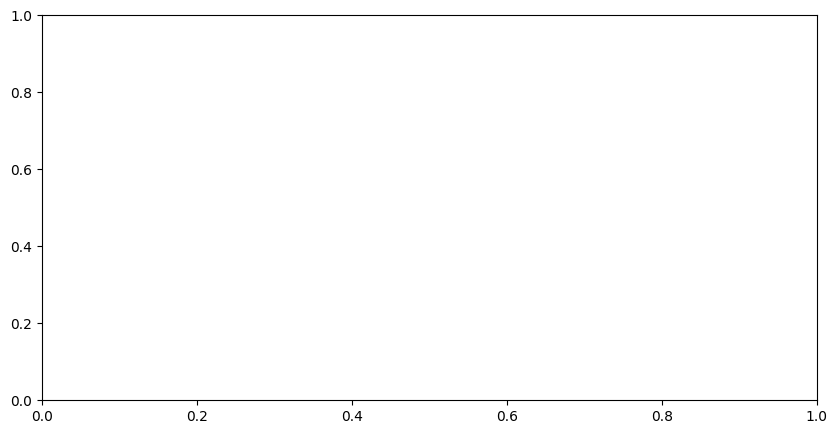

In [65]:
import plotly.express as px
df = data
grp = df.groupby(["eksposisjonUtlopsomr","NAWS Region"]).size()\
        .reset_index(name="frequency")
lenght = len(df)



fig, ax = plt.subplots(figsize=(10, 5))
fig = px.scatter_polar(grp, r="frequency", theta="eksposisjonUtlopsomr", color='NAWS Region',color_discrete_sequence= ['cornflowerblue', 'coral'], title='Exposition of dataset')
fig.show()

### Helning snitt

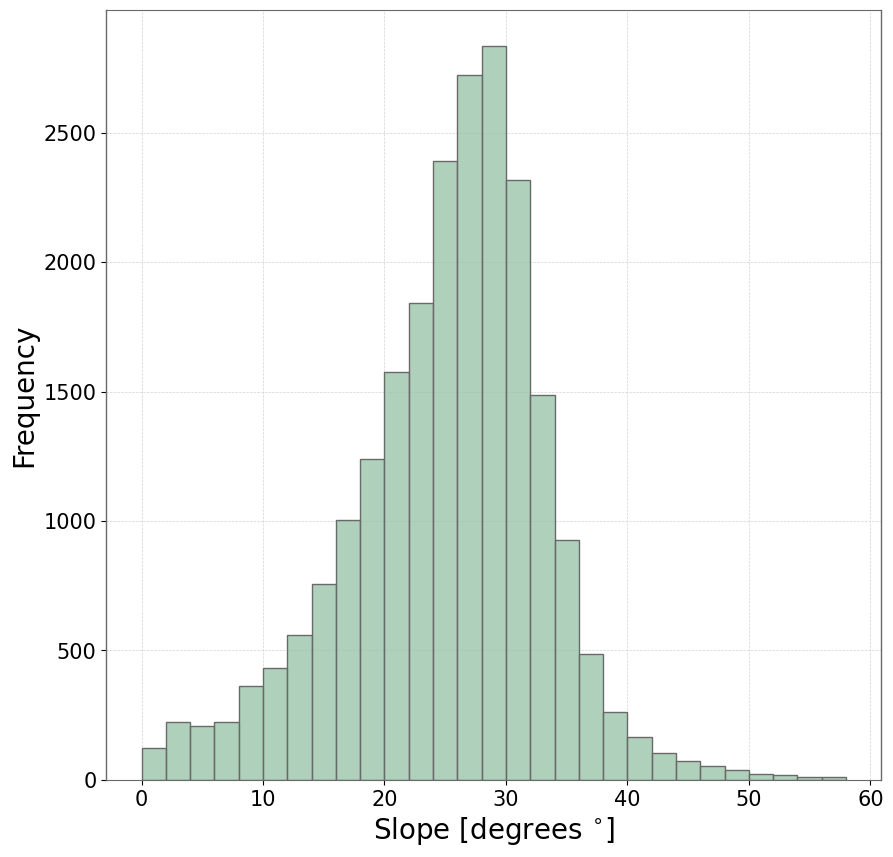

In [238]:

b = np.arange(0, 60, 2)

fig, ax = plt.subplots(figsize=(10, 10))

ax = sns.histplot(data=data, x="snittHelningUtlopssomr_gr", bins=b, zorder=2, color="#95C2A4", ec="dimgray")
#plt.title('Distribution of "mean slope" in detected runout zone', fontsize=10)
plt.xlabel('Slope [degrees $^{\circ}$]', fontsize=20)
plt.ylabel('Frequency', fontsize=20)
plt.grid(color = 'lightgrey', linestyle = '--', linewidth = 0.5, zorder=1)
ax.spines['bottom'].set_color('dimgrey')
ax.spines['top'].set_color('dimgrey') 
ax.spines['right'].set_color('dimgrey')
ax.spines['right'].set_linewidth(1)
ax.spines['left'].set_color('dimgrey')
ax.spines['left'].set_lw(1)
ax.xaxis.label.set_color('black')
ax.yaxis.label.set_color('black')
ax.tick_params(colors='black', which='both', labelsize=15)



In [204]:
print(data['snittHelningUtlopssomr_gr'].mean())
print(data['snittHelningUtlopssomr_gr'].median())

0    28
Name: snittHelningUtlopssomr_gr, dtype: int64
26.0


In [203]:
len(data[data['snittHelningUtlopssomr_gr'] <= 30]) / len(data)*100

78.85650723025583

### Høyde

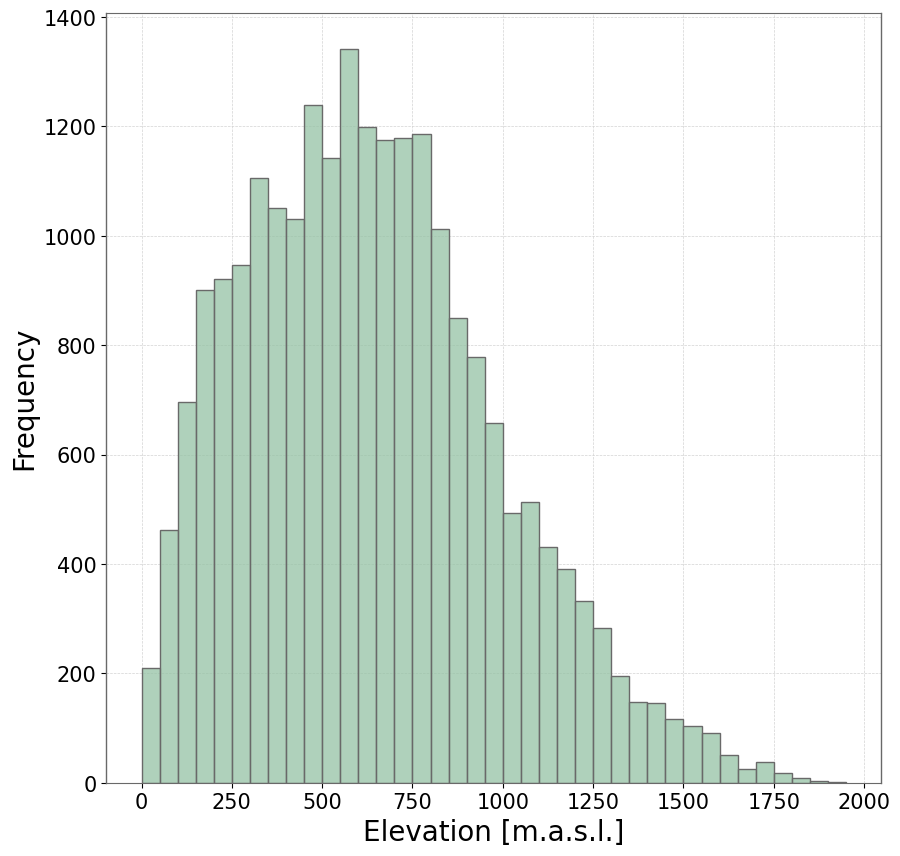

In [239]:
b = np.arange(0, 2000, 50)

fig, ax = plt.subplots(figsize=(10, 10))

ax = sns.histplot(data=data, bins=b, x="Høyde", zorder=2, color="#95C2A4", ec="dimgray")
#plt.title('Distribution of "height" in detected runout zone', fontsize=10)
plt.xlabel('Elevation [m.a.s.l.]', fontsize=20)
plt.ylabel('Frequency', fontsize=20)
plt.grid(color = 'lightgrey', linestyle = '--', linewidth = 0.5, zorder=1)
ax.spines['bottom'].set_color('dimgrey')
ax.spines['top'].set_color('dimgrey') 
ax.spines['right'].set_color('dimgrey')
ax.spines['right'].set_linewidth(1)
ax.spines['left'].set_color('dimgrey')
ax.spines['left'].set_lw(1)
ax.xaxis.label.set_color('black')
ax.yaxis.label.set_color('black')
ax.tick_params(colors='black', which='both', labelsize=15)
#sns.despine()

### Detections per day

In [26]:
#Lyngen counts each day
lyngen_skredDate = pd.read_csv('count_registered_daily_Lyngen.csv', index_col=0)
lyngen_regDate = pd.read_csv('reg_lyngen_1016.csv', index_col=0)

#Romsdal counts each day
romsdal_skredDate = pd.read_csv('count_registered_daily_Romsdal.csv', index_col=0)
romsdal_regDate = pd.read_csv('reg_romsdal_1011.csv', index_col=0)

Text(0.065, 0.5, 'Frequency')

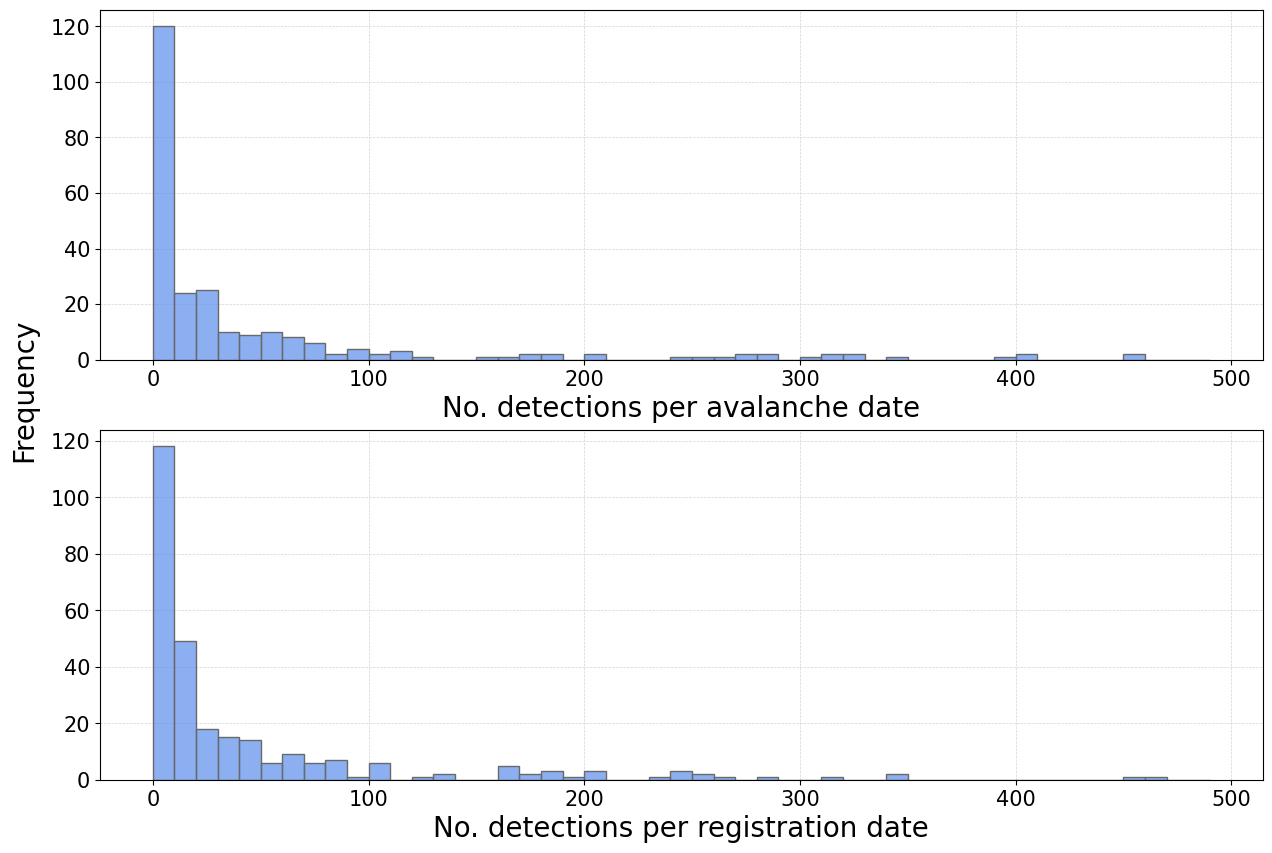

In [244]:
b = np.arange(0, 500, 10)

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(15, 10))

sns.histplot(lyngen_skredDate, x='count', bins=b, zorder=2, color="cornflowerblue", ec="dimgray", ax=ax1)

sns.histplot(lyngen_regDate, x='count', bins=b, zorder=2, color="cornflowerblue", ec="dimgray", ax=ax2) #, ax=axs[1]


#ax =  plt.axvline(lyngen_skredDate['count'].mean(), color='k', linestyle='dashed', linewidth=1, ax=axs[0])


ax1.grid(color = 'lightgrey', linestyle = '--', linewidth = 0.5)
ax2.grid(color = 'lightgrey', linestyle = '--', linewidth = 0.5)

ax1.set_ylabel('')
ax2.set_ylabel('')
ax1.set_xlabel('No. detections per avalanche date', fontsize='20')
ax2.set_xlabel('No. detections per registration date', fontsize='20')

ax1.tick_params(colors='black', which='both', labelsize=15)
ax2.tick_params(colors='black', which='both', labelsize=15)


fig.text(0.065, 0.5, 'Frequency', va='center', rotation='vertical', fontsize='20')

#ax2 = plt.grid(color = 'lightgrey', linestyle = '--', linewidth = 0.5, zorder=1)

#ax1.annotate('Moved clear at the top of the table', (11, 29), (30, -20), textcoords='offset points', arrowprops=dict(facecolor='black', width=0.5, headwidth=5, headlength=7))





In [208]:
print(data['SHAPE_Area'].mode())

0    6796.5
Name: SHAPE_Area, dtype: float64


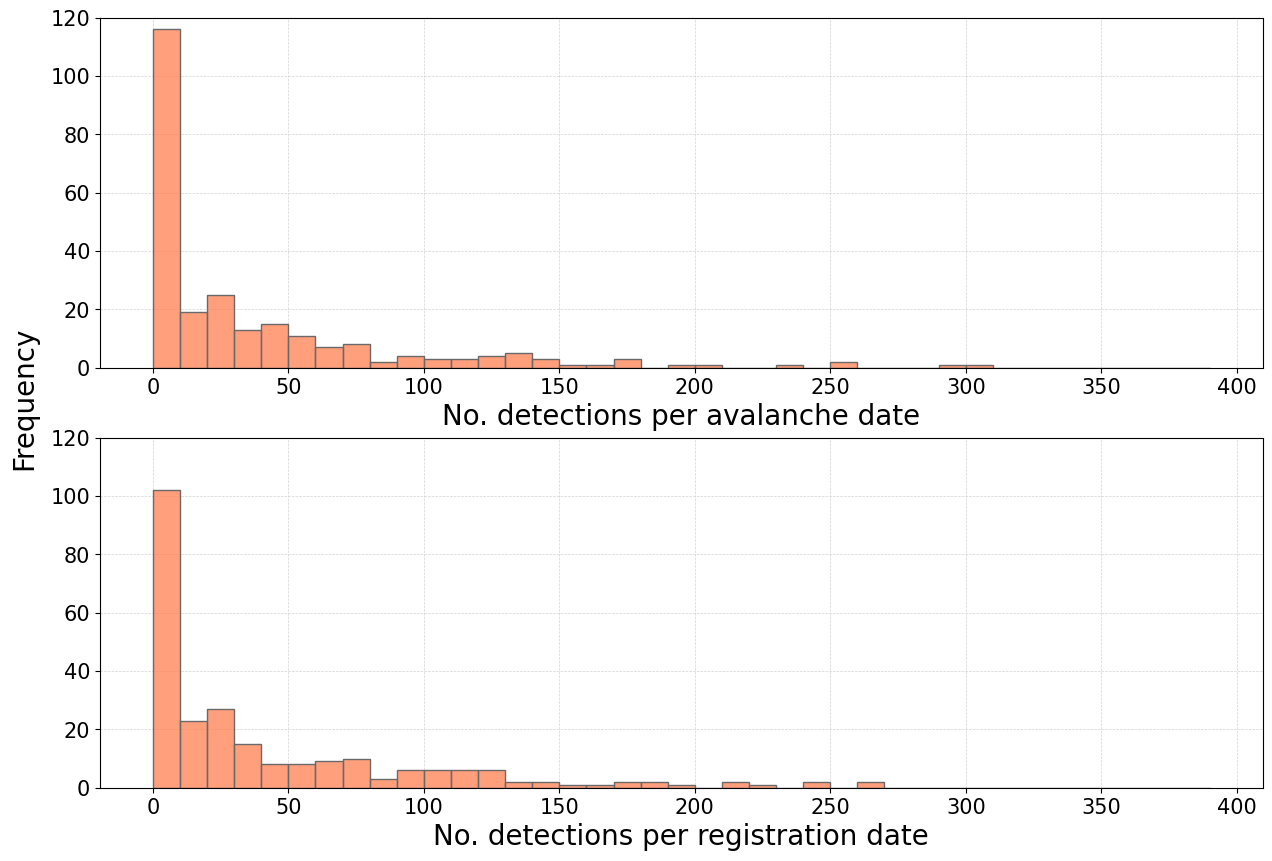

In [245]:
b = np.arange(0, 400, 10)

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(15,10))

sns.histplot(romsdal_skredDate, x='count', bins=b, zorder=2, label='Romsdal', color="coral", ec="dimgray", ax=ax1)
sns.histplot(romsdal_regDate, x='count', bins=b, zorder=2, color="coral", ec="dimgray", ax=ax2)




ax1.grid(color = 'lightgrey', linestyle = '--', linewidth = 0.5)
ax2.grid(color = 'lightgrey', linestyle = '--', linewidth = 0.5)

ax1.set_ylabel('')
ax2.set_ylabel('')
ax1.set_xlabel('No. detections per avalanche date', fontsize='20')
ax2.set_xlabel('No. detections per registration date',fontsize='20')

ax1.set_ylim([0, 120])
ax2.set_ylim([0, 120])

fig.text(0.065, 0.5, 'Frequency', va='center', rotation='vertical', fontsize='20')

ax1.tick_params(colors='black', which='both', labelsize=15)
ax2.tick_params(colors='black', which='both', labelsize=15)